<a href="https://colab.research.google.com/github/Bharathkrishnamurthy/21Day_21_ML-_project/blob/main/DAY8_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

import plotly.graph_objects as go
from plotly.subplots import make_subplots


1.2) Load Dataset

Load the Fashion_MNSIT dataset from keras,splitting it into



(train_images,train_labels)-->training set

(test_images,test_labels)-->test set



In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [ ]:
print("Training images shape:", train_images.shape)
print("Testing images shape:",test_images.shape)
print("Training labels shape:",train_labels_one_hot.shape)
print("Testing labels shape:",test_labels_one_hot.shape)

### 2. Model Building

 2.1) Basic ANN Model

 - **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K

In [ ]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )
ann_model.summary()

### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [ ]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32 ,(3, 3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64 ,(3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [ ]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

3.Train the models

3.1 Train ANN model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

3.2 Training Basic CNN model

ModelCheckpoint: saves best Basic CNN weights (best_basic_cnn_model_weights.weights.h5) based on validation loss.

Training:
Epochs: up to 30 (early stopping controls actual run)

Batch size: 64
Validation on test set

Callbacks: EarlyStopping + ModelCheckpoint

In [11]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7403 - loss: 0.7277
Epoch 1: val_loss improved from inf to 0.41365, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 53ms/step - accuracy: 0.7405 - loss: 0.7273 - val_accuracy: 0.8450 - val_loss: 0.4137
Epoch 2/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8730 - loss: 0.3525
Epoch 2: val_loss improved from 0.41365 to 0.34003, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.8730 - loss: 0.3525 - val_accuracy: 0.8763 - val_loss: 0.3400
Epoch 3/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8918 - loss: 0.2949
Epoch 3: val_loss improved from 0.34003 to 0.30786, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.8918 - loss: 0.2949 - val_accuracy: 0.8871 - val_loss: 0.3079
Epoch 4/30
937/938 ━━━━━━━━━━━━━━━


3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [12]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6424 - loss: 1.0629
Epoch 1: val_loss improved from inf to 0.51543, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 88ms/step - accuracy: 0.6425 - loss: 1.0625 - val_accuracy: 0.8140 - val_loss: 0.5154
Epoch 2/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8142 - loss: 0.5210
Epoch 2: val_loss improved from 0.51543 to 0.38649, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.8142 - loss: 0.5209 - val_accuracy: 0.8522 - val_loss: 0.3865
Epoch 3/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8458 - loss: 0.4309
Epoch 3: val_loss did not improve from 0.38649
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8458 - loss: 0.4309 - val_accuracy: 0.8494 - val_loss: 0.4034
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8526 - loss: 0.4095
Epoch

4) Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-282429710.py:44: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


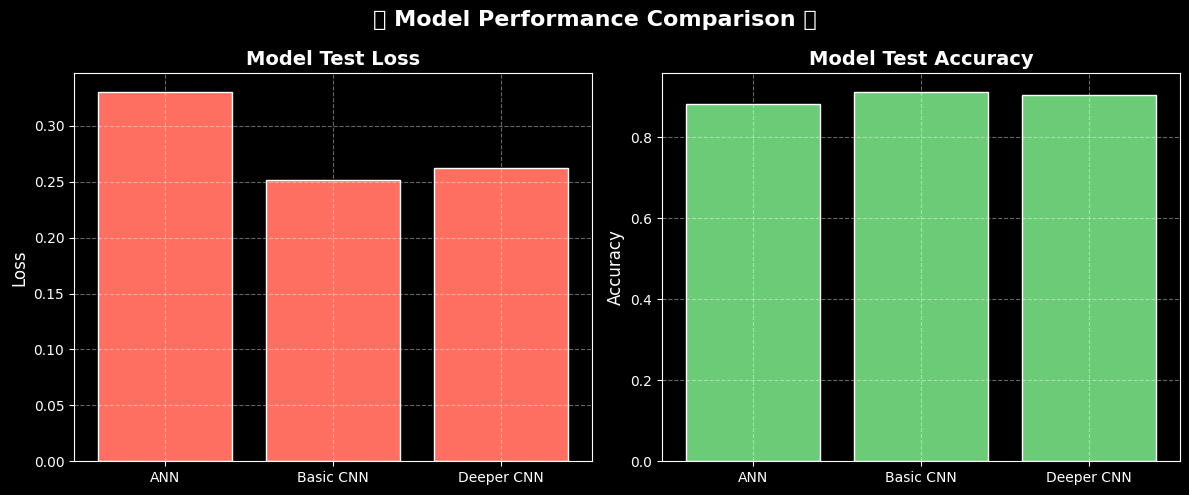

In [13]:
c

#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

4.4) Predictions
This code:

Uses the trained Basic CNN model to predict on test images.

Identifies correctly and incorrectly classified samples.

Randomly selects 100 correct and 100 incorrect predictions.

Displays them in a 20×10 grid:

✅ Correct predictions → Green title (only predicted label).

❌ Incorrect predictions → Red title (Predicted vs True label).

In [ ]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

1.1) load the necessity library


This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [29]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [33]:
cifar100_train_images=cifar100_train_images/255.0
cifar100_test_images=cifar100_test_images/255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [52]:
cifar_100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar_100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(50000, 32, 32, 1)`  
- Testing images shape: `(10000, 32, 32, 1)`  
- Training labels shape: `(50000, 100)`  
- Testing labels shape: `(10000, 100)`  


In [41]:
print("Training images shape:",cifar100_train_images.shape)
print("Testing images shape:",cifar100_test_images.shape)
print("Training labels shape:",cifar_100_train_labels_one_hot.shape)
print("Testing labels shape:",cifar_100_test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


2.model building
- **Flatten (32×32→3072)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K

In [42]:
ann_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(100,activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [45]:
 basic_cnn_model = keras.Sequential([
     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
     keras.layers.MaxPooling2D((2, 2)),
     keras.layers.Conv2D(64, (3, 3), activation='relu'),
     keras.layers.MaxPooling2D((2, 2)),
     keras.layers.Flatten(),
     keras.layers.Dense(64, activation='relu'),
     keras.layers.Dense(100, activation='softmax')
 ])

basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
basic_cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [47]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),



    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax')  # Changed to 100 output classes
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
deeper_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,220 (676.64 KB)

 Trainable params: 172,516 (673.89 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

3.1 Training Ann model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [64]:
from tensorflow import keras

# One-hot encode labels for 100 classes
cifar100_train_labels_one_hot = keras.utils.to_categorical(cifar100_train_labels, 100)
cifar100_test_labels_one_hot = keras.utils.to_categorical(cifar100_test_labels, 100)

# Verify shapes
print("Train labels one-hot shape:", cifar100_train_labels_one_hot.shape)  # (50000, 100)
print("Test labels one-hot shape:", cifar100_test_labels_one_hot.shape)    # (10000, 100)

print("Training ANN model...")
ann_history = ann_model.fit(
    x=cifar100_train_images,
    y=cifar100_train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images, cifar100_test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann],
    shuffle=True
)
print("ANN model training finished.")


Train labels one-hot shape: (50000, 100)
Test labels one-hot shape: (10000, 100)
Training ANN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0648 - loss: 4.1281
Epoch 1: val_loss improved from inf to 4.00410, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0648 - loss: 4.1280 - val_accuracy: 0.0855 - val_loss: 4.0041
Epoch 2/30
777/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0878 - loss: 3.9737
Epoch 2: val_loss improved from 4.00410 to 3.93294, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0879 - loss: 3.9735 - val_accuracy: 0.0962 - val_loss: 3.9329
Epoch 3/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0986 - loss: 3.9039
Epoch 3: val_loss improved from 3.93294 to 3.88089, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0986 - loss: 3.9039 - val_accuracy: 0.1055 - 

3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [69]:
import tensorflow as tf

# Convert numpy arrays to tf.data.Dataset (shuffling + batching)
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_tensor_slices((cifar100_train_images, cifar100_train_labels_one_hot))
train_ds = train_ds.shuffle(buffer_size=50000).batch(BATCH_SIZE).prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((cifar100_test_images, cifar100_test_labels_one_hot))
val_ds = val_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Compile model (ensure compiled)
basic_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint_cnn = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model using tf.data.Dataset...")
basic_cnn_history = basic_cnn_model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[early_stopping, model_checkpoint_cnn]
)
print("Basic CNN training finished.")


Training Basic CNN model using tf.data.Dataset...
Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.0088 - loss: 4.6054
Epoch 1: val_loss improved from inf to 4.60517, saving model to best_basic_cnn_model_weights.weights.h5
391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - accuracy: 0.0088 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.0089 - loss: 4.6054
Epoch 2: val_loss did not improve from 4.60517
391/391 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.0089 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.0095 - loss: 4.6054
Epoch 3: val_loss did not improve from 4.60517
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 130ms/step - accuracy: 0.0095 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.0091 - loss: 4.6053
Epoch 4: val_loss did not improve from 4

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

Loaded weights from best_ann_model_weights.weights.h5 (full load).
Loaded weights from best_basic_cnn_model_weights.weights.h5 (full load).
Full load failed for best_deeper_cnn_model_weights.weights.h5: A total of 3 objects could not be loaded. Example error message for object <Conv2D name=conv2d_17, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3, 3, 3, 32), Received: value.shape=(3, 3, 1, 32). Target variable: <Variable path=sequential_10/conv2d_17/kernel, shape=(3, 3, 3, 32), dtype=float32, value=[[[[ 1.12749174e-01 -1.36483029e-01  6.91380054e-02 -7.51265362e-02
     1.26395479e-01  1.02461323e-01 -9.33706760e-04  1.21407226e-01
    -4.65605184e-02  8.39174390e-02 -2.13986635e-03 -1.35215864e-01
     4.36708480e-02  7.55379796e-02  7.33406842e-03 -1.72685534e-02
    -6.16443157e-02  1.93495899e-02  5.33314943e-02 -1.29457712e-01
     2.86698341e-02 -2.19503939e-02 -9.89193022e-02 -2.69903988e

/tmp/ipython-input-572807476.py:86: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.



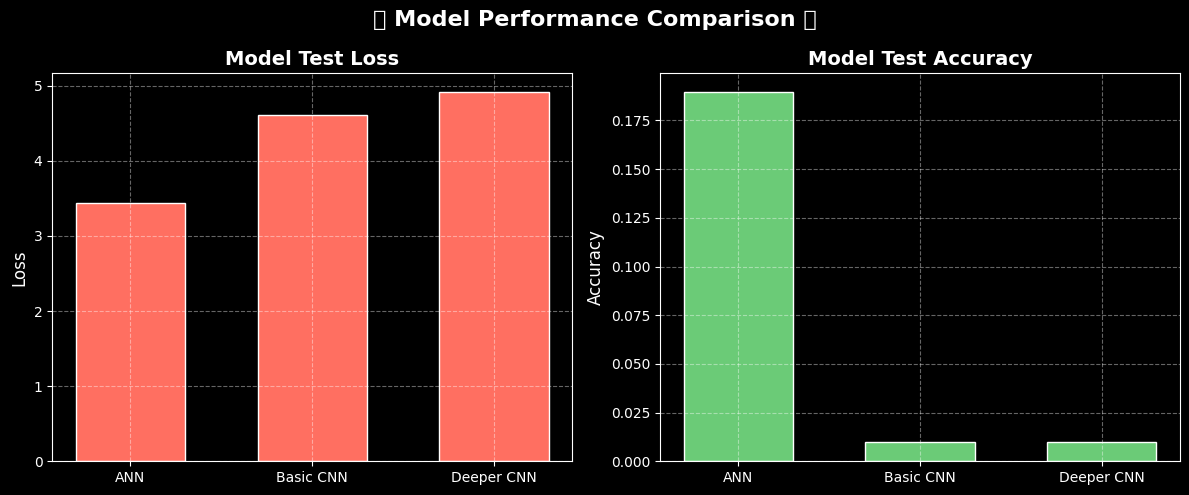

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras

# --- Ensure consistent test-label variables (one-hot) exist ---
# If you already have these variables, this will simply reassign them.
# If not, this will create the one-hot encodings assuming CIFAR-100 (100 classes).
try:
    # integer labels variable (shape (N,1) or (N,))
    _ = cifar100_test_labels
except NameError:
    # try to fall back to other common names
    if 'cifar_100_test_labels' in globals():
        cifar100_test_labels = cifar_100_test_labels
    else:
        raise NameError("Can't find `cifar100_test_labels` or `cifar_100_test_labels` in your namespace.")

if 'cifar100_test_labels_one_hot' not in globals() and 'cifar_100_test_labels_one_hot' in globals():
    cifar100_test_labels_one_hot = cifar_100_test_labels_one_hot

if 'cifar100_test_labels_one_hot' not in globals():
    # create one-hot assuming labels are integer class ids 0..99
    cifar100_test_labels_one_hot = keras.utils.to_categorical(np.squeeze(cifar100_test_labels), num_classes=100)
    print("Created cifar100_test_labels_one_hot with shape:", cifar100_test_labels_one_hot.shape)

# --- Safe weight loading helper ---
def safe_load_weights(model, filepath, by_name_fallback=True):
    try:
        model.load_weights(filepath)
        print(f"Loaded weights from {filepath} (full load).")
        return True
    except Exception as e:
        print(f"Full load failed for {filepath}: {e}")
        if by_name_fallback:
            try:
                model.load_weights(filepath, by_name=True)
                print(f"Loaded matching layers by name from {filepath}. Unmatched layers remain uninitialized.")
                return True
            except Exception as e2:
                print(f"by_name load also failed for {filepath}: {e2}")
        return False

# --- Try loading weights (with safe fallback) ---
ann_ok = safe_load_weights(ann_model, 'best_ann_model_weights.weights.h5')
basic_ok = safe_load_weights(basic_cnn_model, 'best_basic_cnn_model_weights.weights.h5')
deeper_ok = safe_load_weights(deeper_cnn_model, 'best_deeper_cnn_model_weights.weights.h5')

# --- Ensure models are compiled (so evaluate works) ---
# Use the same loss/metrics you trained with. If you used categorical_crossentropy, use one-hot labels.
# If your model was compiled already, compile again to be safe.
ann_model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
basic_cnn_model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
deeper_cnn_model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# --- Evaluate models ---
# Use one-hot labels because loss='categorical_crossentropy'
loss_ann, accuracy_ann = ann_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(cifar100_test_images, cifar100_test_labels_one_hot, verbose=0)

print("\nEvaluation summary:")
print(f"ANN        -> loss: {loss_ann:.4f}, acc: {accuracy_ann:.4f}")
print(f"Basic CNN  -> loss: {loss_basic_cnn:.4f}, acc: {accuracy_basic_cnn:.4f}")
print(f"Deeper CNN -> loss: {loss_deeper_cnn:.4f}, acc: {accuracy_deeper_cnn:.4f}")

# --- Plot Loss & Accuracy comparison (dark mode) ---
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(models, losses, color='#FF6F61', edgecolor='white', width=0.6)
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white', width=0.6)
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix &

Predicting...


/tmp/ipython-input-2274327011.py:50: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



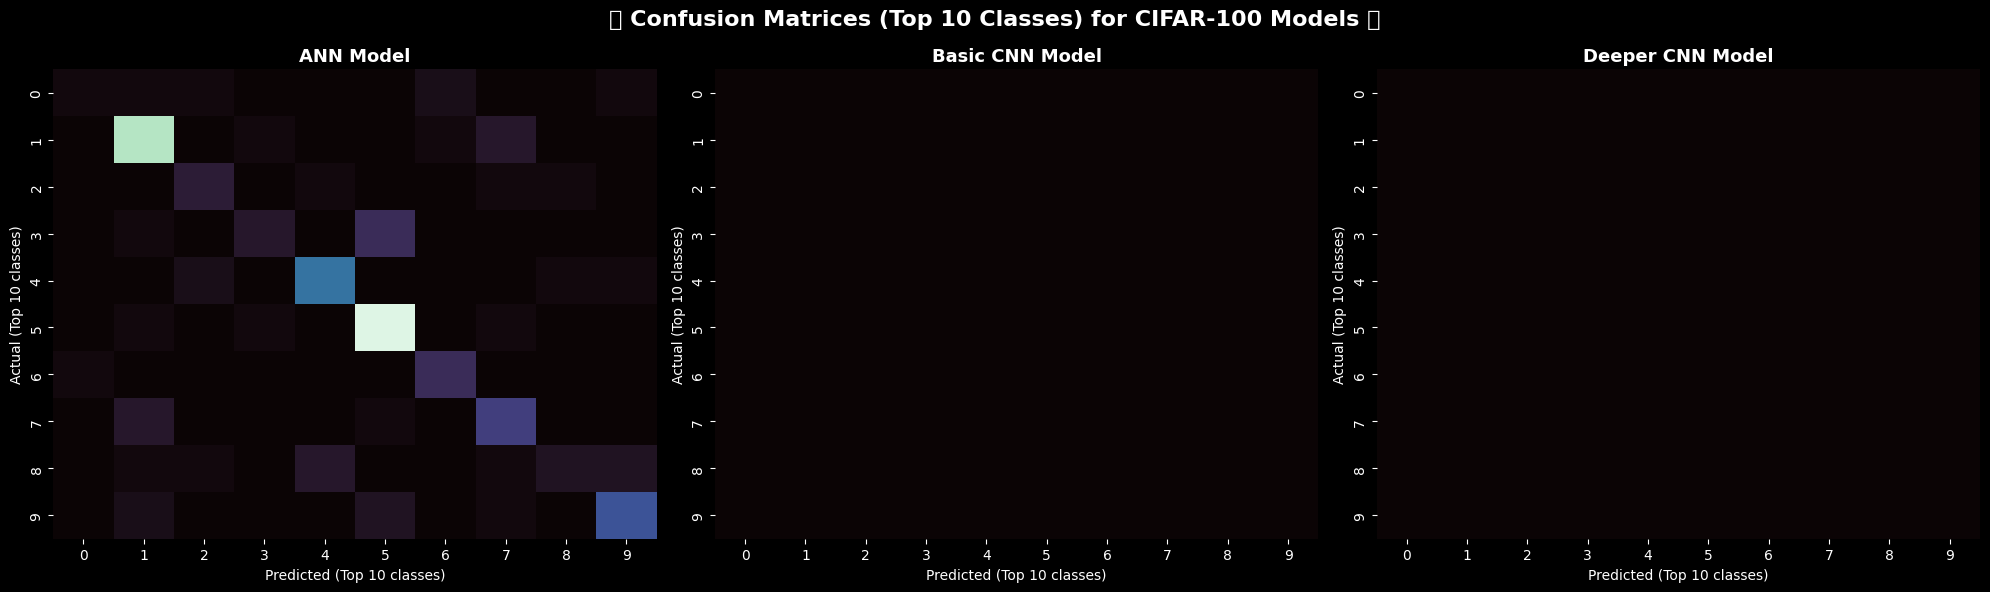

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Predict on CIFAR-100 test set ---
print("Predicting...")
ann_predictions = ann_model.predict(cifar100_test_images, verbose=0)
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images, verbose=0)
deeper_cnn_predictions = deeper_cnn_model.predict(cifar100_test_images, verbose=0)

# --- Convert one-hot labels to integer class indices ---
test_labels_int = np.argmax(cifar100_test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# --- Compute confusion matrices ---
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_predicted_labels)

# --- Plot (only top-10 most frequent classes for visibility) ---
# Find 10 classes where model predicted most often
top_classes = np.bincount(test_labels_int).argsort()[-10:]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.style.use("dark_background")

for ax, cm, title in zip(
    axes,
    [cm_ann, cm_basic, cm_deeper],
    ["ANN Model", "Basic CNN Model", "Deeper CNN Model"]
):
    cm_subset = cm[np.ix_(top_classes, top_classes)]
    sns.heatmap(
        cm_subset,
        annot=False,  # too dense for 100 classes; turn off annotations
        fmt="d",
        cmap="mako",
        ax=ax,
        cbar=False
    )
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel("Predicted (Top 10 classes)")
    ax.set_ylabel("Actual (Top 10 classes)")

plt.suptitle("🔥 Confusion Matrices (Top 10 Classes) for CIFAR-100 Models 🔥", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


In [82]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(
        y=history.history['accuracy'], mode='lines+markers',
        name=f"{name} Train", line=dict(color=color, dash='solid')
    ), row=1, col=1)

    fig.add_trace(go.Scatter(
        y=history.history['val_accuracy'], mode='lines+markers',
        name=f"{name} Val", line=dict(color=color, dash='dot'), showlegend=False
    ), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(
        y=history.history['loss'], mode='lines+markers',
        name=f"{name} Train", line=dict(color=color, dash='solid')
    ), row=1, col=2)

    fig.add_trace(go.Scatter(
        y=history.history['val_loss'], mode='lines+markers',
        name=f"{name} Val", line=dict(color=color, dash='dot'), showlegend=False
    ), row=1, col=2)

# Layout tweaks
fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot) ✨",
    height=550,
    width=1200,
    template="plotly_dark"
)

# Add axis labels
fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_yaxes(title_text="Accuracy", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.show()


#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


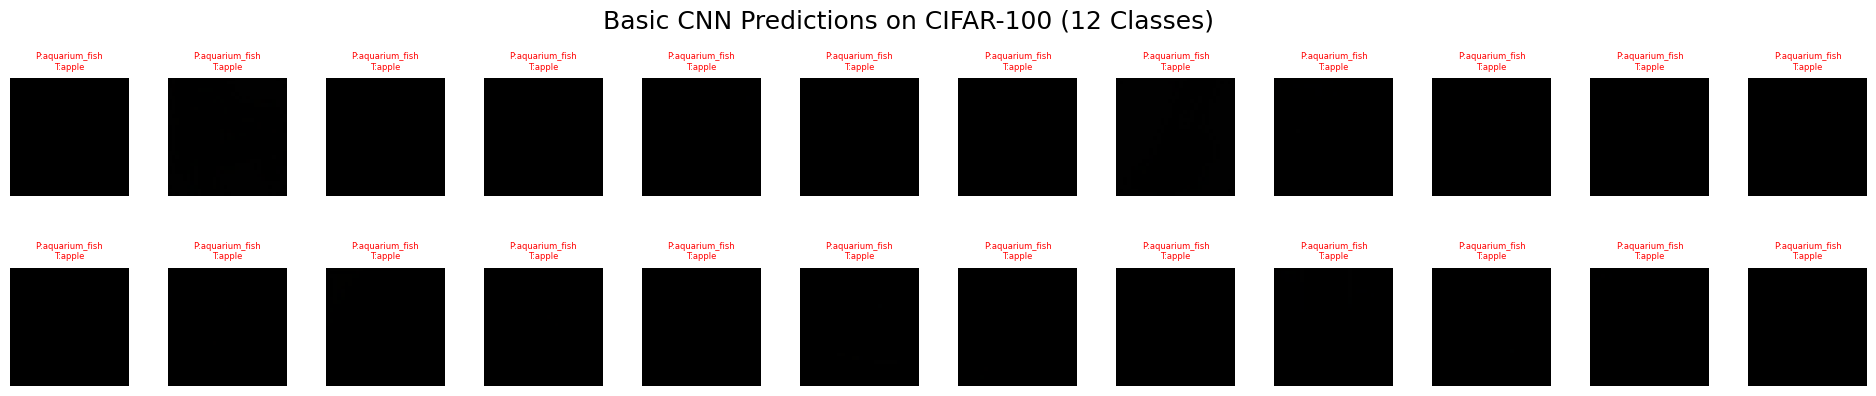

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Predictions
basic_cnn_predictions = basic_cnn_model.predict(cifar100_test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Integer labels
if cifar100_test_labels.ndim > 1:
    test_labels_int = np.argmax(cifar100_test_labels, axis=1)
else:
    test_labels_int = cifar100_test_labels

# Selected 12 classes (example)
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
               'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy']

# Filter indices for selected classes
indices_selected = np.where(np.isin(test_labels_int, selected_classes))[0]

# Correct & incorrect indices
correct_indices = indices_selected[basic_cnn_predicted_labels[indices_selected] == test_labels_int[indices_selected]]
incorrect_indices = indices_selected[basic_cnn_predicted_labels[indices_selected] != test_labels_int[indices_selected]]

# Sample a mix
num_correct = min(24, len(correct_indices))
num_incorrect = min(24, len(incorrect_indices))

selected_correct = np.random.choice(correct_indices, num_correct, replace=False)
selected_incorrect = np.random.choice(incorrect_indices, num_incorrect, replace=False)

all_indices = np.concatenate((selected_correct, selected_incorrect))
np.random.shuffle(all_indices)

# Grid layout
num_cols = 12
num_rows = (len(all_indices) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2*num_cols, 2*num_rows), facecolor='white')
fig.suptitle("Basic CNN Predictions on CIFAR-100 (12 Classes)", fontsize=18, y=1.05, color='black')

for i, idx in enumerate(all_indices):
    row, col = divmod(i, num_cols)
    axes[row, col].imshow(cifar100_test_images[idx])
    axes[row, col].set_facecolor('white')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels_int[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels_int[idx]:
        axes[row, col].set_title(f"{pred}", fontsize=7, color="green")
    else:
        axes[row, col].set_title(f"P:{pred}\nT:{true}", fontsize=6, color="red")

    axes[row, col].axis("off")

# Turn off extra axes
for j in range(len(all_indices), num_rows*num_cols):
    row, col = divmod(j, num_cols)
    axes[row, col].axis("off")

plt.subplots_adjust(top=0.88, hspace=0.6, wspace=0.3)
plt.show()
